# Analysis on spoof files after adding normalised noise

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display

import IPython.display as ipd

from copy import deepcopy

%matplotlib inline 

In [266]:
randomSeed=1
np.random.seed(randomSeed)

In [267]:
corpusBasePath='/homes/bc305/myphd/datasets/ASVSpoof2017_v2.0/'

In [268]:
def plot_3_signals(sr,x,x_norm,x_no_norm):
    """
    x: the original audio signal
    x_norm: signal whose first 100ms is replaced by scaled noise
    x_no_norm: signal whose first 100ms is replaced by noise (no scaling)
    
    Plots 3 signals to visualise differences caused !
    """
    plt.figure(figsize=(8, 12))

    plt.subplot(3,1,1)
    librosa.display.waveplot(x, sr)
    plt.title('Original signal')

    plt.subplot(3,1,2)
    librosa.display.waveplot(x_no_norm, sr)
    plt.title('Adding 100ms noise in start - WITHOUT NOISE SCALING')

    plt.subplot(3,1,3)
    librosa.display.waveplot(x_norm, sr)
    plt.title('Adding 100ms noise in start - AFTER SCALING NOISE')

    
def get_normalised_noise(x,snr,duration,start=0,verbose=0):
    """ 
    Inputs:
        x : the utterance to update the first duration amount of samples with noise
        duration: in samples (1600 samples corresponds to 100 ms). Amount of noise to use for updating x
        snr : signal to noise ratio to scale the noise
    Outputs:
        x_new : updated utterance x where first "duration" number of samples are replaced by
                normalised white gaussian noise  
                
    Normalisation equation:         
        a = sqrt | var(x) 10^-SNR |
    """
    
    x_org=deepcopy(x)
    tmp=deepcopy(x)    
    noise=np.random.normal(0,1,duration)
    
    """ Compute the scale factor """
    scaler = np.sqrt(np.var(x) * (10 ** (-snr)))        
    
    """ Get the new signal using scaled noise"""
    normalised_noise = scaler * noise    
    x[start:start+duration] = normalised_noise
    
    """ Modified signal without using normalisation on noise"""
    tmp[start:start+duration] = noise
    
    if verbose==2: 
        print('Showing the stats.......')
        print('Noise scaler = ', scaler)
        print('Original noise variance = %.9f' %(np.var(noise)))
        print('Normalised noise variance = %.9f' %(np.var(normalised_noise)))        
        print('-----------------------------------------')
        print('Original signal variances = %.9f' %(np.var(x_org)))
        print('Un-normalised noise-added signal variances = %.9f' %(np.var(tmp)))        
        print('Normalised-noise added signal variance = %.9f' %(np.var(x)))
        
    
    return x,tmp
    #returns normalised and un-normalised signals

def read_audio(filename):
    
    if fileName.startswith('T'):
        audioPath=os.path.join(corpusBasePath,'ASVspoof2017_V2_train',fileName)
    elif fileName.startswith('D'):
        audioPath=os.path.join(corpusBasePath,'ASVspoof2017_V2_dev',fileName)
    else:
        audioPath=os.path.join(corpusBasePath,'ASVspoof2017_V2_eval',fileName)    
    
    if not os.path.exists(audioPath):
        print('Audio file not found in: %s' %(audioPath))
        return
        
    return librosa.load(audioPath,sr=None, dtype=np.float32)

# Example audio to analyse


Following spoof files in training set change scores with high-confidence after replacing the first 100ms samples with white gaussian noise (un-normalised) in the Training set

    T_1001600.wav spoof M0007 S03 E21 P02 R01 0.23 0.81
    T_1001604.wav spoof M0010 S08 E21 P02 R01 0.15 0.83
    T_1001682.wav spoof M0006 S03 E21 P02 R01 0.21 0.81
    T_1001758.wav spoof M0006 S05 E21 P02 R01 0.23 0.8

corresponding audio file:
/homes/bc305/myphd/experiments/matlab/matlab_projects/csl-journal-part1/cnn/interventions/light_cnn/fixed_noise/100ms_in_start/onSpoof/seed1/train/intervenedFiles.txt


# Using 0 db SNR

Showing the stats.......
Noise scaler =  0.19941625902122548
Original noise variance = 0.997287853
Normalised noise variance = 0.039658991
-----------------------------------------
Original signal variances = 0.039766844
Un-normalised noise-added signal variances = 0.097527802
Normalised-noise added signal variance = 0.041125096


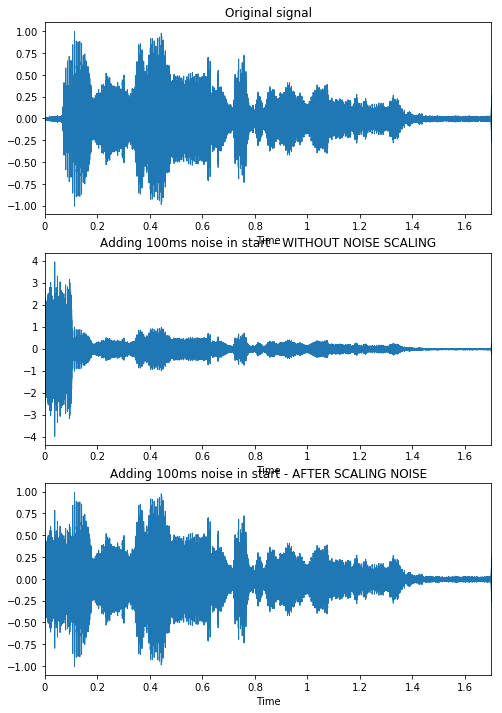

In [269]:
# 1. Using 0 dB SNR

duration=1600 #(100ms samples)
snr=0
fileName='T_1001600.wav'
x,sr=read_audio(fileName)
x_org=deepcopy(x)          # To avoid overriding on same signal

normalised_x_new,x_no_norm=get_normalised_noise(x,snr,duration,start=0,verbose=2)

plot_3_signals(sr,x_org,normalised_x_new,x_no_norm)


In [270]:
# Listen to the normalised audio 

x=normalised_x_new
ipd.Audio(x, rate=sr) # load a NumPy array

In [271]:
# Listen to the UN-normalised audio 

x=x_no_norm
ipd.Audio(x, rate=sr) # load a NumPy array


# On the normalised new signal, the amplitude/volume of sound is loud and clear
# On Un-normalised signal, the amplitude of the signal is low now (cause of the noise whose variance 
# is very high supresses the signal power?)

# Using 1 db SNR

Showing the stats.......
Noise scaler =  0.06306095809771724
Original noise variance = 0.978447595
Normalised noise variance = 0.003890977
-----------------------------------------
Original signal variances = 0.039766844
Un-normalised noise-added signal variances = 0.096336588
Normalised-noise added signal variance = 0.039018165


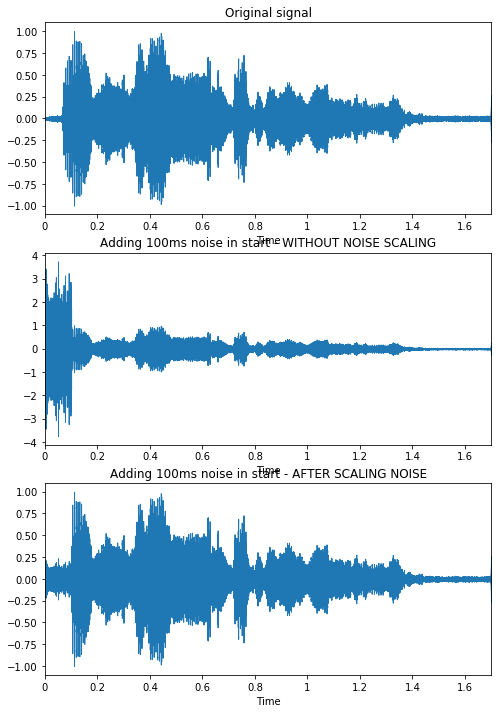

In [272]:
# 1. Using 1 dB SNR

duration=1600 #(100ms samples)
snr=1
fileName='T_1001600.wav'
x,sr=read_audio(fileName)
x_org=deepcopy(x)          # To avoid overriding on same signal

normalised_x_new,x_no_norm=get_normalised_noise(x,snr,duration,start=0,verbose=2)

plot_3_signals(sr,x_org,normalised_x_new,x_no_norm)


In [273]:
# Listen to the normalised audio 

x=normalised_x_new
ipd.Audio(x, rate=sr) # load a NumPy array

In [274]:
# Listen to the UN-normalised audio 

x=x_no_norm
ipd.Audio(x, rate=sr) # load a NumPy array


# On the normalised new signal, the amplitude/volume of sound is loud and clear
# On Un-normalised signal, the amplitude of the signal is low now (cause of the noise whose variance 
# is very high supresses the signal power?)

# Using 2 db SNR

Showing the stats.......
Noise scaler =  0.019941625902122548
Original noise variance = 1.039849353
Normalised noise variance = 0.000413515
-----------------------------------------
Original signal variances = 0.039766844
Un-normalised noise-added signal variances = 0.099949934
Normalised-noise added signal variance = 0.038813647


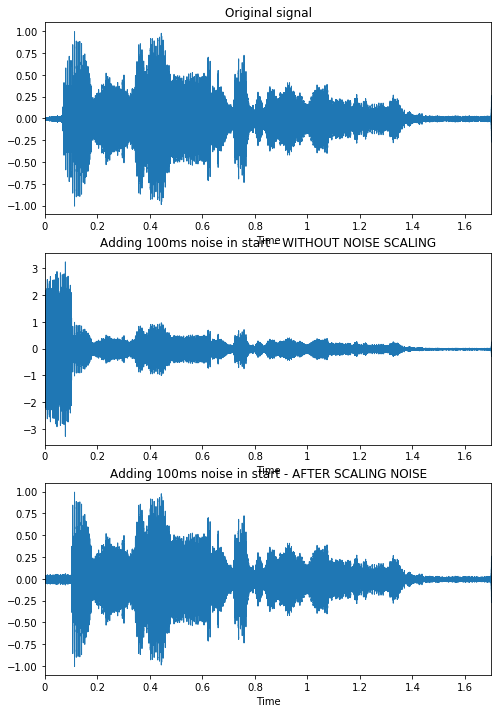

In [275]:
# 1. Using 2 dB SNR

duration=1600 #(100ms samples)
snr=2
fileName='T_1001600.wav'
x,sr=read_audio(fileName)
x_org=deepcopy(x)          # To avoid overriding on same signal

normalised_x_new,x_no_norm=get_normalised_noise(x,snr,duration,start=0,verbose=2)

plot_3_signals(sr,x_org,normalised_x_new,x_no_norm)


In [276]:
# Listen to the normalised audio 

x=normalised_x_new
ipd.Audio(x, rate=sr) # load a NumPy array

In [277]:
# Listen to the UN-normalised audio 

x=x_no_norm
ipd.Audio(x, rate=sr) # load a NumPy array


# On the normalised new signal, the amplitude/volume of sound is loud and clear
# On Un-normalised signal, the amplitude of the signal is low now (cause of the noise whose variance 
# is very high supresses the signal power?)

# Using 3 db SNR

Showing the stats.......
Noise scaler =  0.006306095809771724
Original noise variance = 0.987090166
Normalised noise variance = 0.000039253
-----------------------------------------
Original signal variances = 0.039766844
Un-normalised noise-added signal variances = 0.096858241
Normalised-noise added signal variance = 0.038791638


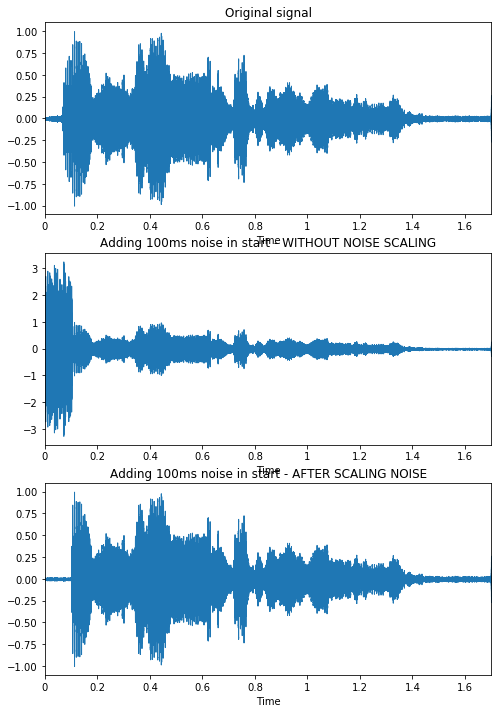

In [278]:
# 1. Using 3 dB SNR

duration=1600 #(100ms samples)
snr=3
fileName='T_1001600.wav'
x,sr=read_audio(fileName)
x_org=deepcopy(x)          # To avoid overriding on same signal

normalised_x_new,x_no_norm=get_normalised_noise(x,snr,duration,start=0,verbose=2)

plot_3_signals(sr,x_org,normalised_x_new,x_no_norm)


In [279]:
# Listen to the normalised audio 

x=normalised_x_new
ipd.Audio(x, rate=sr) # load a NumPy array

In [280]:
# Listen to the UN-normalised audio 

x=x_no_norm
ipd.Audio(x, rate=sr) # load a NumPy array


# This sounds abrupt-loud-noise in the start
# I have found such kind of noises in the genuine signals - abrupt burst sound type

# We hear sudden burst sound: this sound characteristics seems to be somewhat similar to that of BCS sound
# found in the genuine signals. Could this be one reason - as I have been making a high-level hypothesis?

# Using 4 db SNR

Showing the stats.......
Noise scaler =  0.0019941625902122548
Original noise variance = 0.984797097
Normalised noise variance = 0.000003916
-----------------------------------------
Original signal variances = 0.039766844
Un-normalised noise-added signal variances = 0.096718974
Normalised-noise added signal variance = 0.038789559


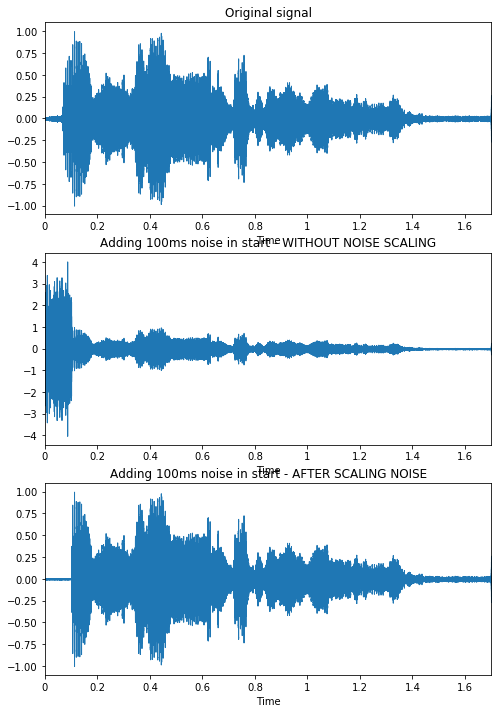

In [281]:
# 1. Using 4 dB SNR

duration=1600 #(100ms samples)
snr=4
fileName='T_1001600.wav'
x,sr=read_audio(fileName)
x_org=deepcopy(x)          # To avoid overriding on same signal

normalised_x_new,x_no_norm=get_normalised_noise(x,snr,duration,start=0,verbose=2)

plot_3_signals(sr,x_org,normalised_x_new,x_no_norm)


# Using 5 db SNR

Showing the stats.......
Noise scaler =  0.0006306095809771724
Original noise variance = 1.010773132
Normalised noise variance = 0.000000402
-----------------------------------------
Original signal variances = 0.039766844
Un-normalised noise-added signal variances = 0.098312542
Normalised-noise added signal variance = 0.038789354


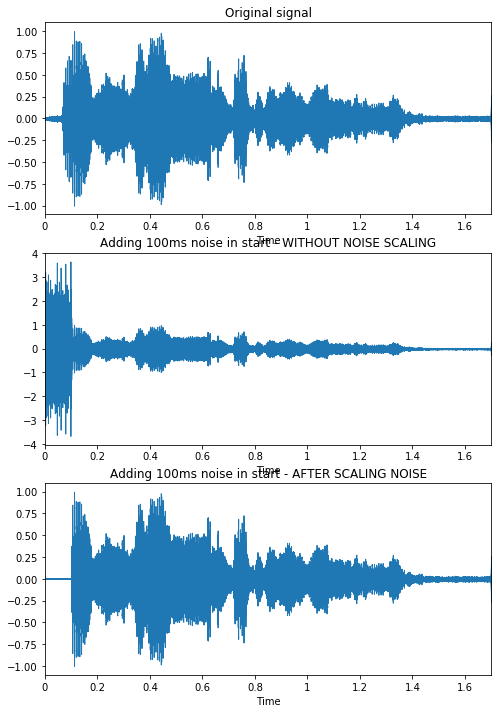

In [282]:
# 1. Using 5 dB SNR

duration=1600 #(100ms samples)
snr=5
fileName='T_1001600.wav'
x,sr=read_audio(fileName)
x_org=deepcopy(x)          # To avoid overriding on same signal

normalised_x_new,x_no_norm=get_normalised_noise(x,snr,duration,start=0,verbose=2)

plot_3_signals(sr,x_org,normalised_x_new,x_no_norm)


In [283]:
# Listen to the normalised audio 

x=normalised_x_new
ipd.Audio(x, rate=sr) # load a NumPy array

In [284]:
# Listen to the UN-normalised audio 

x=x_no_norm
ipd.Audio(x, rate=sr) # load a NumPy array


# This sounds abrupt-loud-noise in the start
# I have found such kind of noises in the genuine signals - abrupt burst sound type

# We hear sudden burst sound: this sound characteristics seems to be somewhat similar to that of BCS sound
# found in the genuine signals. Could this be one reason - as I have been making a high-level hypothesis?

# Using 6 db SNR

Showing the stats.......
Noise scaler =  0.00019941625902122548
Original noise variance = 0.990742887
Normalised noise variance = 0.000000039
-----------------------------------------
Original signal variances = 0.039766844
Un-normalised noise-added signal variances = 0.097066745
Normalised-noise added signal variance = 0.038789332


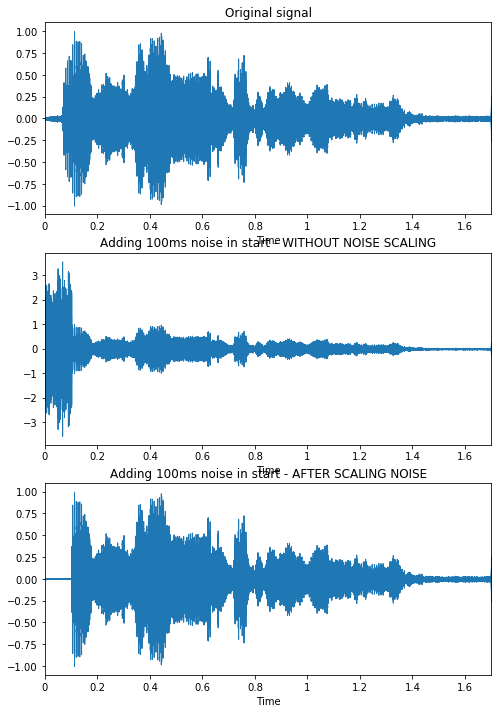

In [285]:
# 1. Using 6 dB SNR

duration=1600 #(100ms samples)
snr=6
fileName='T_1001600.wav'
x,sr=read_audio(fileName)
x_org=deepcopy(x)          # To avoid overriding on same signal

normalised_x_new,x_no_norm=get_normalised_noise(x,snr,duration,start=0,verbose=2)

plot_3_signals(sr,x_org,normalised_x_new,x_no_norm)

In [286]:
# Listen to the original audio 

x=x_org
ipd.Audio(x, rate=sr) # load a NumPy array

In [287]:
librosa.output.write_wav('T_1001600.wav', x_org, sr)

In [288]:
# Listen to the normalised audio 

x=normalised_x_new
ipd.Audio(x, rate=sr) # load a NumPy array

In [289]:
librosa.output.write_wav('normalised_T_1001600.wav', normalised_x_new, sr)

In [290]:
# Listen to the UN-normalised audio 

x=x_no_norm
ipd.Audio(x, rate=sr) # load a NumPy array


# This sounds abrupt-loud-noise in the start
# I have found such kind of noises in the genuine signals - abrupt burst sound type

# We hear sudden burst sound: this sound characteristics seems to be somewhat similar to that of BCS sound
# found in the genuine signals. Could this be one reason - as I have been making a high-level hypothesis?


In [291]:
# Lets save the un-normalised audio

librosa.output.write_wav('unNormalised_T_1001600.wav', x_no_norm, sr)

# Using 10 db SNR

Showing the stats.......
Noise scaler =  1.994162590212255e-06
Original noise variance = 0.979303999
Normalised noise variance = 0.000000000
-----------------------------------------
Original signal variances = 0.039766844
Un-normalised noise-added signal variances = 0.096412309
Normalised-noise added signal variance = 0.038789328


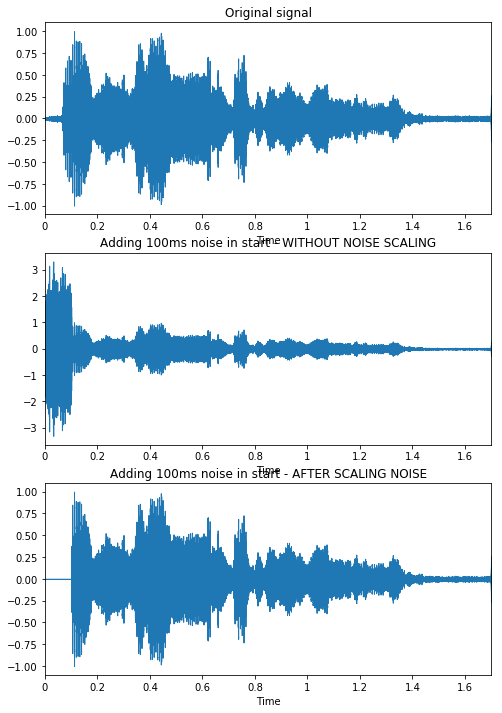

In [292]:
# 1. Using 10 dB SNR

duration=1600 #(100ms samples)
snr=10
fileName='T_1001600.wav'
x,sr=read_audio(fileName)
x_org=deepcopy(x)          # To avoid overriding on same signal

normalised_x_new,x_no_norm=get_normalised_noise(x,snr,duration,start=0,verbose=2)

plot_3_signals(sr,x_org,normalised_x_new,x_no_norm)

In [293]:
# Listen to the normalised audio 

x=normalised_x_new
ipd.Audio(x, rate=sr) # load a NumPy array

In [294]:
# Listen to the UN-normalised audio 

x=x_no_norm
ipd.Audio(x, rate=sr) # load a NumPy array


# This sounds abrupt-loud-noise in the start
# I have found such kind of noises in the genuine signals - abrupt burst sound type

# We hear sudden burst sound: this sound characteristics seems to be somewhat similar to that of BCS sound
# found in the genuine signals. Could this be one reason - as I have been making a high-level hypothesis?

# Remarks

 * T_1001600.wav spoof M0007 S03 E21 P02 R01 0.23 0.81
 
The spoof signal "T_1001600.wav" initially get a score of 0.23 (means it is correctly classified as spoof). But after replacing first 100 ms with white gaussian noise (un-normalised noise), the same signal now recieve a score of 0.81.

As we observe from above three figures. The middle figure is the signal with un-normalised noise. As can be observed adding such a noise has a huge impact on the signal. However, the last figure where we show the signal after adding the scaled version of the same noise, we see not much difference between the original signal (TOP) and the new one (Bottom). Therefore, now the CNN classification also should not change (Todo..)

# On the Genuine examples

Last two columns shows original score and score after the intervention
 
 
 * T_1001308.wav genuine M0006 S02 - - - 0.59 0.82
 * T_1001505.wav genuine M0002 S02 - - - 0.69 0.81
 * T_1000257.wav genuine M0006 S02 - - - 0.71 0.84
 * T_1000357.wav genuine M0001 S08 - - - 0.86 0.82

# Using 0 db SNR

Showing the stats.......
Noise scaler =  0.20249606846889973
Original noise variance = 1.028927420
Normalised noise variance = 0.042190817
-----------------------------------------
Original signal variances = 0.041004658
Un-normalised noise-added signal variances = 0.099726364
Normalised-noise added signal variance = 0.043347105


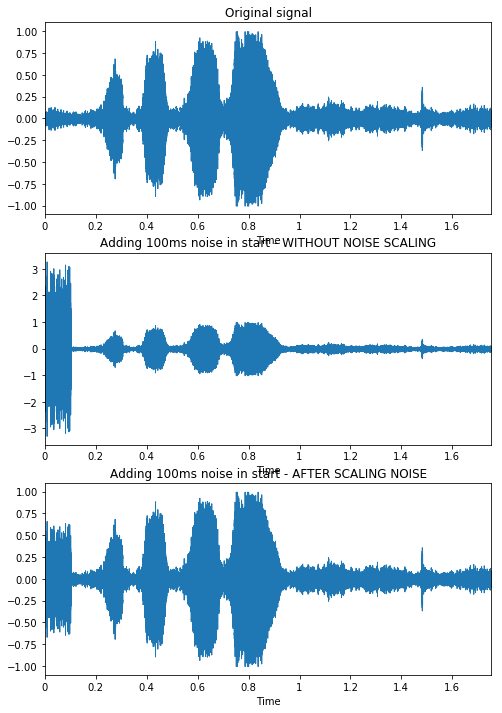

In [295]:
# 1. Using 0 dB SNR

duration=1600 #(100ms samples)
snr=0
fileName='T_1001308.wav'
x,sr=read_audio(fileName)
x_org=deepcopy(x)          # To avoid overriding on same signal

normalised_x_new,x_no_norm=get_normalised_noise(x,snr,duration,start=0,verbose=2)

plot_3_signals(sr,x_org,normalised_x_new,x_no_norm)

In [296]:
# Listen to the original audio 

x=x_org
ipd.Audio(x, rate=sr) # load a NumPy array

In [297]:
# Listen to the normalised audio 

x=normalised_x_new
ipd.Audio(x, rate=sr) # load a NumPy array

In [298]:
# Listen to the UN-normalised audio 

x=x_no_norm
ipd.Audio(x, rate=sr) # load a NumPy array


# Using 6 db SNR

Showing the stats.......
Noise scaler =  0.00020249606846889972
Original noise variance = 0.997561336
Normalised noise variance = 0.000000041
-----------------------------------------
Original signal variances = 0.041004658
Un-normalised noise-added signal variances = 0.097900078
Normalised-noise added signal variance = 0.040936772


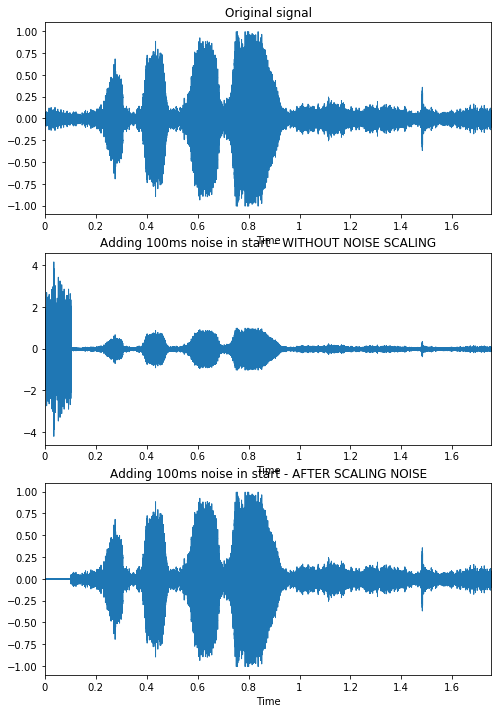

In [299]:
# 1. Using 0 dB SNR

duration=1600 #(100ms samples)
snr=6
fileName='T_1001308.wav'
x,sr=read_audio(fileName)
x_org=deepcopy(x)          # To avoid overriding on same signal

normalised_x_new,x_no_norm=get_normalised_noise(x,snr,duration,start=0,verbose=2)

plot_3_signals(sr,x_org,normalised_x_new,x_no_norm)

# Burst Click Sound - examples in Genuine subset


On Training set

 * T_1000395.wav,0.25,2.1,bcs plus low sound amplitude
 * T_1002963.wav,0.05,1.92,low channel noise sounds so GENUINE GOOD EXAMPLE 
 * T_1002990.wav

In [300]:
# 1. BCS with low amplitude sound: T_1000395.wav

fileName = 'T_1000395.wav'         # Training set genuine file
signal,sr=read_audio(fileName)

#librosa.display.waveplot(signal, sr)

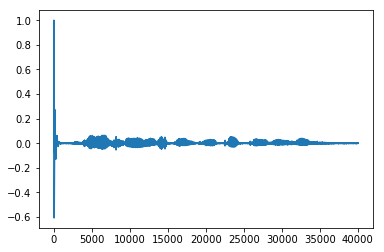

In [301]:
plt.plot(signal)

In [302]:
# Listen to the audio 

ipd.Audio(signal, rate=sr) # load a NumPy array

In [303]:
# Lets save the un-normalised audio

librosa.output.write_wav('burst_click_sound_T_1000395.wav', signal, sr)

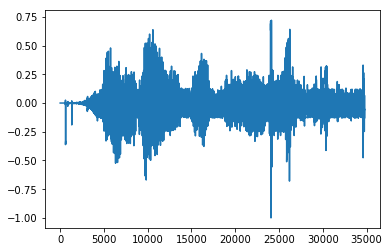

In [304]:
# 2. T_1000097.wav,0.3,1.75,bcs plus highly noisy signal
fileName = 'T_1000097.wav'
signal,sr=read_audio(fileName)
plt.plot(signal)

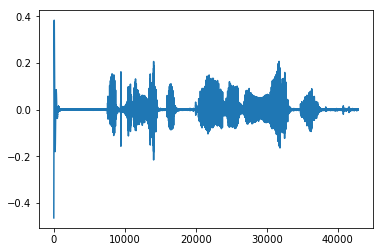

In [305]:
# 3. T_1000098.wav,0.46,2.35,bcs

fileName='T_1000098.wav'
signal,sr=read_audio(fileName)
plt.plot(signal)

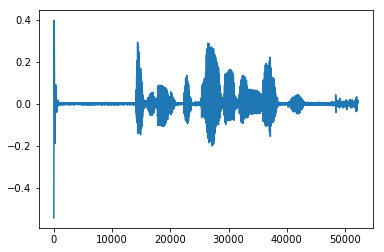

In [306]:
# 4. T_1000021.wav,0.87,2.67,bcs

fileName='T_1000021.wav'
signal,sr=read_audio(fileName)
plt.plot(signal)

## BCS in spoof examples 

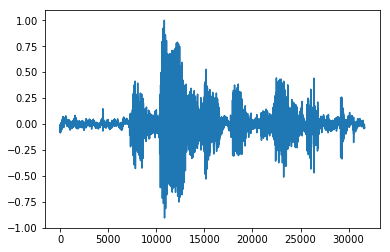

In [307]:
# 1. T_1002936.wav,0.45,1.86,bcs

fileName='T_1002936.wav'
signal,sr=read_audio(fileName)
plt.plot(signal)

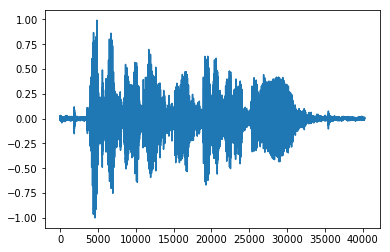

In [308]:
# 2. T_1002907.wav,0.22,2.0,bcs plus low channel noise

fileName='T_1002907.wav'
signal,sr=read_audio(fileName)
plt.plot(signal)